# Support Vector Regression (SVR)

## Importing the libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:2].values
y = dataset.iloc[:,-1].values

In [3]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [7]:
 y = y.reshape(len(y),1)

In [8]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]





































































































































































































































































































































































































































































































































## Feature Scaling

In [18]:
 from sklearn.preprocessing import StandardScaler
 sc_x = StandardScaler()
 sc_y = StandardScaler()
 x = sc_x.fit_transform(x)
 y = sc_y.fit_transform(y)

In [19]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [20]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [21]:
print(sc_x)

StandardScaler()


In [22]:
print(sc_y)

StandardScaler()


## Training the SVR model on the whole dataset

In [23]:
from sklearn.svm import SVR
regression = SVR(kernel='rbf')
regression.fit(x, y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [26]:
sc_y.inverse_transform(regression.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[252789.13921624]])

## Visualising the SVR results

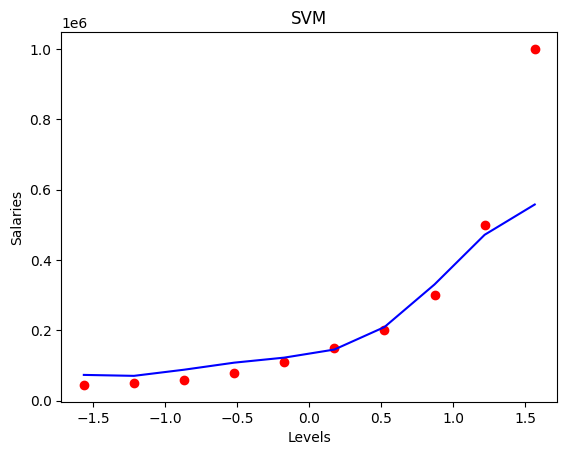

In [33]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regression.predict(x).reshape(-1,1)), color = 'blue')
plt.title('SVM')
plt.xlabel('Levels')
plt.ylabel('Salaries')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

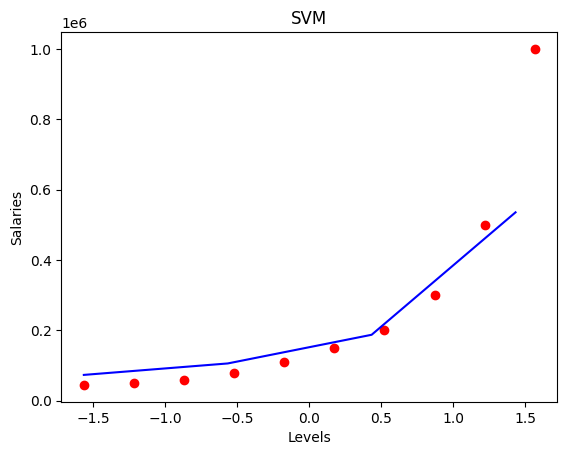

In [45]:
x_grid =  np.arange(min(sc_x.inverse_transform(x)),max(sc_x.inverse_transform(x)), 1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = "red")
plt.plot(x_grid,sc_y.inverse_transform(regression.predict(sc_x.transform(x_grid)).reshape(-1,1)), color = 'blue')
plt.title('SVM')
plt.xlabel('Levels')
plt.ylabel('Salaries')
plt.show()